In [1]:
#The next experiment went welll I think. K401-micro with altering ATP concentrations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [3]:
K401_2ruta = '/Users/jazzeruncal/Desktop/k401hydrolisis2.xlsx'

In [4]:
K401_2df = pd.read_excel(K401_2ruta, skiprows=35)
print(K401_2df.iloc[:22, 1:11])
K401_2df = K401_2df.iloc[:22, 1:11]

   Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0        Time     T° 360         A7         B7         C7         D7   
1    00:00:00         24      1.177      1.163      1.203      1.201   
2    00:01:00         24       1.31      1.304      1.326      1.312   
3    00:02:00         24      1.421      1.418      1.422      1.386   
4    00:03:00         24      1.507      1.503      1.495      1.436   
5    00:04:00         24      1.573      1.566      1.543      1.463   
6    00:05:00         24      1.621      1.611      1.581      1.479   
7    00:06:00         24      1.656      1.645      1.605      1.487   
8    00:07:00         24      1.683      1.671      1.624      1.492   
9    00:08:00         24      1.702      1.689      1.636      1.493   
10   00:09:00         24      1.717      1.703      1.648      1.493   
11   00:10:00         24      1.731      1.718      1.657      1.494   
12   00:11:00         24      1.743      1.728      1.662      1

In [5]:
K401_2df = K401_2df.drop(columns=['Unnamed: 2'])
K401_2df

,Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Time,A7,B7,C7,D7,E7,F7,G7,H7
1,00:00:00,1.177,1.163,1.203,1.201,1.166,0.967,0.948,0.966
2,00:01:00,1.31,1.304,1.326,1.312,1.23,0.965,0.944,0.963
3,00:02:00,1.421,1.418,1.422,1.386,1.254,0.963,0.945,0.961
4,00:03:00,1.507,1.503,1.495,1.436,1.262,0.963,0.945,0.961
5,00:04:00,1.573,1.566,1.543,1.463,1.263,0.962,0.944,0.959
6,00:05:00,1.621,1.611,1.581,1.479,1.263,0.962,0.943,0.959
7,00:06:00,1.656,1.645,1.605,1.487,1.264,0.961,0.941,0.957
8,00:07:00,1.683,1.671,1.624,1.492,1.266,0.962,0.941,0.957
9,00:08:00,1.702,1.689,1.636,1.493,1.265,0.96,0.94,0.957


In [6]:
# Rename specific columns
K401_2df = K401_2df.rename(columns={'Unnamed: 1': 'Time', 'Unnamed: 3': 'A7', 'Unnamed: 4': 'B7', 'Unnamed: 5' : 'C7', 'Unnamed: 6' : 'D7', 'Unnamed: 7' : 'E7', 'Unnamed: 8' : 'F7', 'Unnamed: 9' : 'G7', 'Unnamed: 10' : 'H7'})

K401_2df

,Time,A7,B7,C7,D7,E7,F7,G7,H7
0,Time,A7,B7,C7,D7,E7,F7,G7,H7
1,00:00:00,1.177,1.163,1.203,1.201,1.166,0.967,0.948,0.966
2,00:01:00,1.31,1.304,1.326,1.312,1.23,0.965,0.944,0.963
3,00:02:00,1.421,1.418,1.422,1.386,1.254,0.963,0.945,0.961
4,00:03:00,1.507,1.503,1.495,1.436,1.262,0.963,0.945,0.961
5,00:04:00,1.573,1.566,1.543,1.463,1.263,0.962,0.944,0.959
6,00:05:00,1.621,1.611,1.581,1.479,1.263,0.962,0.943,0.959
7,00:06:00,1.656,1.645,1.605,1.487,1.264,0.961,0.941,0.957
8,00:07:00,1.683,1.671,1.624,1.492,1.266,0.962,0.941,0.957
9,00:08:00,1.702,1.689,1.636,1.493,1.265,0.96,0.94,0.957


In [7]:
K401_2df = K401_2df.drop(index=0)
K401_2df

,Time,A7,B7,C7,D7,E7,F7,G7,H7
1,00:00:00,1.177,1.163,1.203,1.201,1.166,0.967,0.948,0.966
2,00:01:00,1.31,1.304,1.326,1.312,1.23,0.965,0.944,0.963
3,00:02:00,1.421,1.418,1.422,1.386,1.254,0.963,0.945,0.961
4,00:03:00,1.507,1.503,1.495,1.436,1.262,0.963,0.945,0.961
5,00:04:00,1.573,1.566,1.543,1.463,1.263,0.962,0.944,0.959
6,00:05:00,1.621,1.611,1.581,1.479,1.263,0.962,0.943,0.959
7,00:06:00,1.656,1.645,1.605,1.487,1.264,0.961,0.941,0.957
8,00:07:00,1.683,1.671,1.624,1.492,1.266,0.962,0.941,0.957
9,00:08:00,1.702,1.689,1.636,1.493,1.265,0.96,0.94,0.957
10,00:09:00,1.717,1.703,1.648,1.493,1.265,0.96,0.939,0.957


In [8]:
# Create a new column 'Time_in_minutes' with sequential integers starting from 0
K401_2df['Time_in_minutes'] = range(len(K401_2df))



K401_2df

,Time,A7,B7,C7,D7,E7,F7,G7,H7,Time_in_minutes
1,00:00:00,1.177,1.163,1.203,1.201,1.166,0.967,0.948,0.966,0
2,00:01:00,1.31,1.304,1.326,1.312,1.23,0.965,0.944,0.963,1
3,00:02:00,1.421,1.418,1.422,1.386,1.254,0.963,0.945,0.961,2
4,00:03:00,1.507,1.503,1.495,1.436,1.262,0.963,0.945,0.961,3
5,00:04:00,1.573,1.566,1.543,1.463,1.263,0.962,0.944,0.959,4
6,00:05:00,1.621,1.611,1.581,1.479,1.263,0.962,0.943,0.959,5
7,00:06:00,1.656,1.645,1.605,1.487,1.264,0.961,0.941,0.957,6
8,00:07:00,1.683,1.671,1.624,1.492,1.266,0.962,0.941,0.957,7
9,00:08:00,1.702,1.689,1.636,1.493,1.265,0.96,0.94,0.957,8
10,00:09:00,1.717,1.703,1.648,1.493,1.265,0.96,0.939,0.957,9


In [9]:
# Calculate the average of columns 'A', 'B', and 'C' and create a new column 'Average'
K401_2df['Average'] = K401_2df[['F7', 'G7', 'H7']].mean(axis=1)
K401_2df

,Time,A7,B7,C7,D7,E7,F7,G7,H7,Time_in_minutes,Average
1,00:00:00,1.177,1.163,1.203,1.201,1.166,0.967,0.948,0.966,0,0.960333
2,00:01:00,1.31,1.304,1.326,1.312,1.23,0.965,0.944,0.963,1,0.957333
3,00:02:00,1.421,1.418,1.422,1.386,1.254,0.963,0.945,0.961,2,0.956333
4,00:03:00,1.507,1.503,1.495,1.436,1.262,0.963,0.945,0.961,3,0.956333
5,00:04:00,1.573,1.566,1.543,1.463,1.263,0.962,0.944,0.959,4,0.955
6,00:05:00,1.621,1.611,1.581,1.479,1.263,0.962,0.943,0.959,5,0.954667
7,00:06:00,1.656,1.645,1.605,1.487,1.264,0.961,0.941,0.957,6,0.953
8,00:07:00,1.683,1.671,1.624,1.492,1.266,0.962,0.941,0.957,7,0.953333
9,00:08:00,1.702,1.689,1.636,1.493,1.265,0.96,0.94,0.957,8,0.952333
10,00:09:00,1.717,1.703,1.648,1.493,1.265,0.96,0.939,0.957,9,0.952


In [10]:
# Subtract A2 from B2, C2, and D2
K401_2df['A7_adjusted'] = K401_2df['A7'] - K401_2df['Average']
K401_2df['B7_adjusted'] = K401_2df['B7'] - K401_2df['Average']
K401_2df['C7_adjusted'] = K401_2df['C7'] - K401_2df['Average']
K401_2df['D7_adjusted'] = K401_2df['D7'] - K401_2df['Average']
K401_2df['E7_adjusted'] = K401_2df['E7'] - K401_2df['Average']
K401_2df['F7_adjusted'] = K401_2df['F7'] - K401_2df['Average']
K401_2df['G7_adjusted'] = K401_2df['G7'] - K401_2df['Average']
K401_2df['H7_adjusted'] = K401_2df['H7'] - K401_2df['Average']
K401_2df

,Time,A7,B7,C7,D7,E7,F7,G7,H7,Time_in_minutes,Average,A7_adjusted,B7_adjusted,C7_adjusted,D7_adjusted,E7_adjusted,F7_adjusted,G7_adjusted,H7_adjusted
1,00:00:00,1.177,1.163,1.203,1.201,1.166,0.967,0.948,0.966,0,0.960333,0.216667,0.202667,0.242667,0.240667,0.205667,0.006667,-0.012333,0.005667
2,00:01:00,1.31,1.304,1.326,1.312,1.23,0.965,0.944,0.963,1,0.957333,0.352667,0.346667,0.368667,0.354667,0.272667,0.007667,-0.013333,0.005667
3,00:02:00,1.421,1.418,1.422,1.386,1.254,0.963,0.945,0.961,2,0.956333,0.464667,0.461667,0.465667,0.429667,0.297667,0.006667,-0.011333,0.004667
4,00:03:00,1.507,1.503,1.495,1.436,1.262,0.963,0.945,0.961,3,0.956333,0.550667,0.546667,0.538667,0.479667,0.305667,0.006667,-0.011333,0.004667
5,00:04:00,1.573,1.566,1.543,1.463,1.263,0.962,0.944,0.959,4,0.955,0.618,0.611,0.588,0.508,0.308,0.007,-0.011,0.004
6,00:05:00,1.621,1.611,1.581,1.479,1.263,0.962,0.943,0.959,5,0.954667,0.666333,0.656333,0.626333,0.524333,0.308333,0.007333,-0.011667,0.004333
7,00:06:00,1.656,1.645,1.605,1.487,1.264,0.961,0.941,0.957,6,0.953,0.703,0.692,0.652,0.534,0.311,0.008,-0.012,0.004
8,00:07:00,1.683,1.671,1.624,1.492,1.266,0.962,0.941,0.957,7,0.953333,0.729667,0.717667,0.670667,0.538667,0.312667,0.008667,-0.012333,0.003667
9,00:08:00,1.702,1.689,1.636,1.493,1.265,0.96,0.94,0.957,8,0.952333,0.749667,0.736667,0.683667,0.540667,0.312667,0.007667,-0.012333,0.004667
10,00:09:00,1.717,1.703,1.648,1.493,1.265,0.96,0.939,0.957,9,0.952,0.765,0.751,0.696,0.541,0.313,0.008,-0.013,0.005


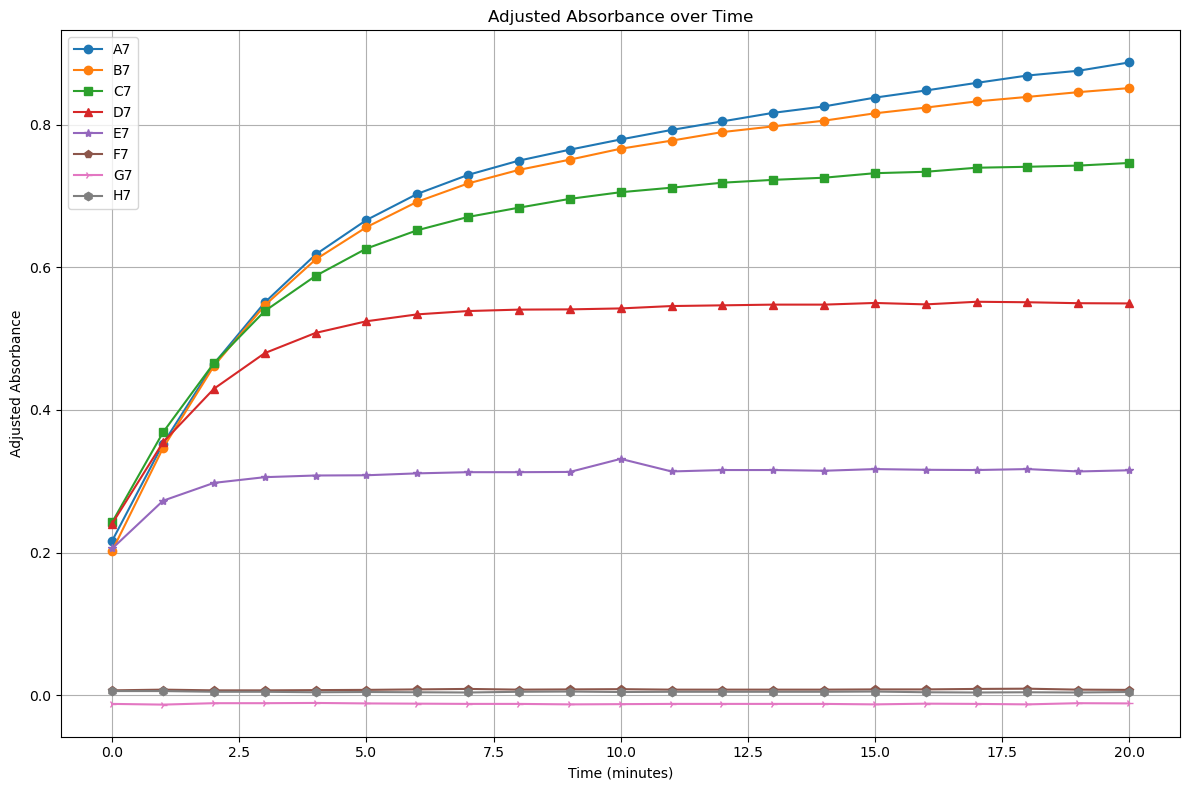

In [11]:
# Plot each column against Time_in_minutes
plt.figure(figsize=(12, 8))

plt.plot(K401_2df['Time_in_minutes'], K401_2df['A7_adjusted'], marker='o', linestyle='-', label='A7')
plt.plot(K401_2df['Time_in_minutes'], K401_2df['B7_adjusted'], marker='o', linestyle='-', label='B7')
plt.plot(K401_2df['Time_in_minutes'], K401_2df['C7_adjusted'], marker='s', linestyle='-', label='C7')
plt.plot(K401_2df['Time_in_minutes'], K401_2df['D7_adjusted'], marker='^', linestyle='-', label='D7')
plt.plot(K401_2df['Time_in_minutes'], K401_2df['E7_adjusted'], marker='*', linestyle='-', label='E7')
plt.plot(K401_2df['Time_in_minutes'], K401_2df['F7_adjusted'], marker='p', linestyle='-', label='F7')
plt.plot(K401_2df['Time_in_minutes'], K401_2df['G7_adjusted'], marker='4', linestyle='-', label='G7')
plt.plot(K401_2df['Time_in_minutes'], K401_2df['H7_adjusted'], marker='h', linestyle='-', label='H7')

# Add titles and labels
plt.title('Adjusted Absorbance over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Adjusted Absorbance')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

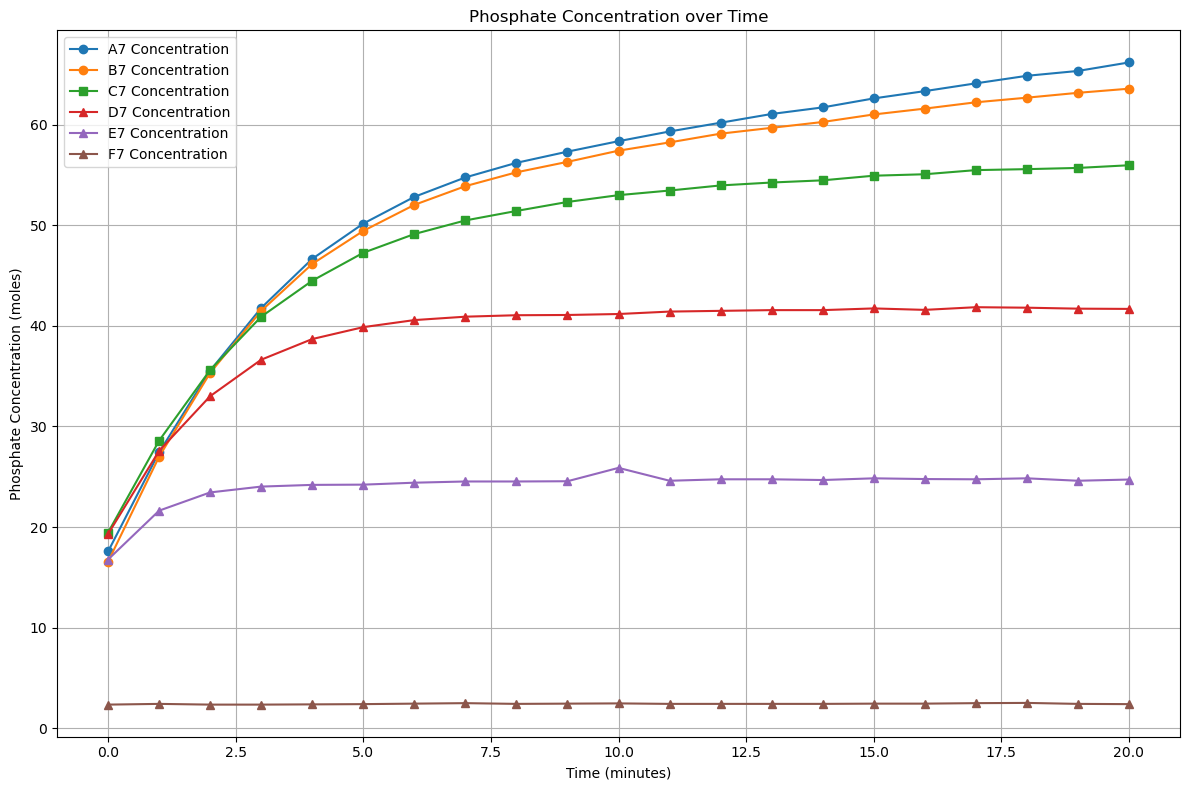

In [12]:
# Define the standard curve equation to calculate phosphate concentration
def calculate_concentration(y):
    return (y + 0.0259) / 0.0138

# Calculate phosphate concentrations for each adjusted absorbance value
K401_2df['A7_concentration'] = calculate_concentration(K401_2df['A7_adjusted'])
K401_2df['B7_concentration'] = calculate_concentration(K401_2df['B7_adjusted'])
K401_2df['C7_concentration'] = calculate_concentration(K401_2df['C7_adjusted'])
K401_2df['D7_concentration'] = calculate_concentration(K401_2df['D7_adjusted'])
K401_2df['E7_concentration'] = calculate_concentration(K401_2df['E7_adjusted'])
K401_2df['F7_concentration'] = calculate_concentration(K401_2df['F7_adjusted'])

# Plot each concentration column against Time_in_minutes
plt.figure(figsize=(12, 8))

plt.plot(K401_2df['Time_in_minutes'], K401_2df['A7_concentration'], marker='o', linestyle='-', label='A7 Concentration')
plt.plot(K401_2df['Time_in_minutes'], K401_2df['B7_concentration'], marker='o', linestyle='-', label='B7 Concentration')
plt.plot(K401_2df['Time_in_minutes'], K401_2df['C7_concentration'], marker='s', linestyle='-', label='C7 Concentration')
plt.plot(K401_2df['Time_in_minutes'], K401_2df['D7_concentration'], marker='^', linestyle='-', label='D7 Concentration')
plt.plot(K401_2df['Time_in_minutes'], K401_2df['E7_concentration'], marker='^', linestyle='-', label='E7 Concentration')
plt.plot(K401_2df['Time_in_minutes'], K401_2df['F7_concentration'], marker='^', linestyle='-', label='F7 Concentration')

# Add titles and labels
plt.title('Phosphate Concentration over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Phosphate Concentration (moles)')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# Normalize phosphate concentrations by subtracting the initial concentration
concentration_columns = ['A7_concentration', 'B7_concentration', 'C7_concentration', 'D7_concentration', 'E7_concentration']
for col in concentration_columns:
    initial_concentration = K401_2df[col].iloc[0]
    K401_2df[f'{col}_normalized'] = K401_2df[col] - initial_concentration

K401_2df

,Time,A7,B7,C7,D7,E7,F7,G7,H7,Time_in_minutes,...,B7_concentration,C7_concentration,D7_concentration,E7_concentration,F7_concentration,A7_concentration_normalized,B7_concentration_normalized,C7_concentration_normalized,D7_concentration_normalized,E7_concentration_normalized
1,00:00:00,1.177,1.163,1.203,1.201,1.166,0.967,0.948,0.966,0,...,16.562802,19.461353,19.316425,16.780193,2.359903,0.0,0.0,0.0,0.0,0.0
2,00:01:00,1.31,1.304,1.326,1.312,1.23,0.965,0.944,0.963,1,...,26.997585,28.591787,27.577295,21.635266,2.432367,9.855072,10.434783,9.130435,8.26087,4.855072
3,00:02:00,1.421,1.418,1.422,1.386,1.254,0.963,0.945,0.961,2,...,35.330918,35.620773,33.012077,23.44686,2.359903,17.971014,18.768116,16.15942,13.695652,6.666667
4,00:03:00,1.507,1.503,1.495,1.436,1.262,0.963,0.945,0.961,3,...,41.490338,40.910628,36.635266,24.02657,2.359903,24.202899,24.927536,21.449275,17.318841,7.246377
5,00:04:00,1.573,1.566,1.543,1.463,1.263,0.962,0.944,0.959,4,...,46.152174,44.485507,38.688406,24.195652,2.384058,29.082126,29.589372,25.024155,19.371981,7.415459
6,00:05:00,1.621,1.611,1.581,1.479,1.263,0.962,0.943,0.959,5,...,49.437198,47.263285,39.871981,24.219807,2.408213,32.584541,32.874396,27.801932,20.555556,7.439614
7,00:06:00,1.656,1.645,1.605,1.487,1.264,0.961,0.941,0.957,6,...,52.021739,49.123188,40.572464,24.413043,2.456522,35.241546,35.458937,29.661836,21.256039,7.63285
8,00:07:00,1.683,1.671,1.624,1.492,1.266,0.962,0.941,0.957,7,...,53.881643,50.475845,40.910628,24.533816,2.504831,37.173913,37.318841,31.014493,21.594203,7.753623
9,00:08:00,1.702,1.689,1.636,1.493,1.265,0.96,0.94,0.957,8,...,55.258454,51.417874,41.055556,24.533816,2.432367,38.623188,38.695652,31.956522,21.73913,7.753623
10,00:09:00,1.717,1.703,1.648,1.493,1.265,0.96,0.939,0.957,9,...,56.297101,52.311594,41.07971,24.557971,2.456522,39.7343,39.7343,32.850242,21.763285,7.777778


In [14]:
print(K401_2df.dtypes)

Time                           object
A7                             object
B7                             object
C7                             object
D7                             object
E7                             object
F7                             object
G7                             object
H7                             object
Time_in_minutes                 int64
Average                        object
A7_adjusted                    object
B7_adjusted                    object
C7_adjusted                    object
D7_adjusted                    object
E7_adjusted                    object
F7_adjusted                    object
G7_adjusted                    object
H7_adjusted                    object
A7_concentration               object
B7_concentration               object
C7_concentration               object
D7_concentration               object
E7_concentration               object
F7_concentration               object
A7_concentration_normalized    object
B7_concentra

In [15]:
# Convert concentration columns to numeric
concentration_columns = ['A7_concentration_normalized', 'B7_concentration_normalized', 'C7_concentration_normalized', 'D7_concentration_normalized', 'E7_concentration_normalized']
for col in concentration_columns:
    K401_2df[col] = pd.to_numeric(K401_2df[col], errors='coerce')

# Check the data types after conversion
print(K401_2df.dtypes)

Time                            object
A7                              object
B7                              object
C7                              object
D7                              object
E7                              object
F7                              object
G7                              object
H7                              object
Time_in_minutes                  int64
Average                         object
A7_adjusted                     object
B7_adjusted                     object
C7_adjusted                     object
D7_adjusted                     object
E7_adjusted                     object
F7_adjusted                     object
G7_adjusted                     object
H7_adjusted                     object
A7_concentration                object
B7_concentration                object
C7_concentration                object
D7_concentration                object
E7_concentration                object
F7_concentration                object
A7_concentration_normaliz

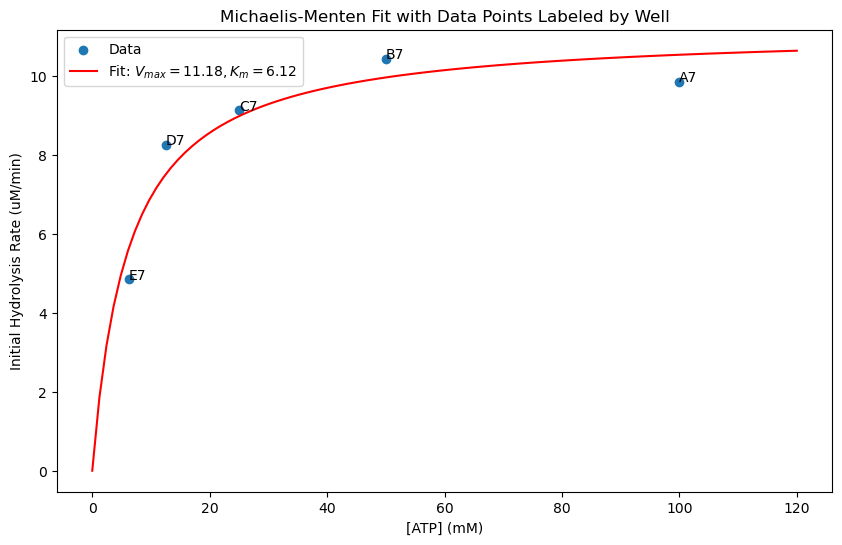

Vmax: 11.18 µM/min
Km: 6.12 mM


In [16]:
# Function to calculate initial rate with the first 2 points
def calculate_initial_rate(time, concentration):
    slope, intercept, r_value, p_value, std_err = linregress(time[:2], concentration[:2])
    return slope

# Recalculate initial rates for each well using normalized concentrations
initial_rates_normalized = {}
for col in concentration_columns:
    initial_rate = calculate_initial_rate(K401_2df['Time_in_minutes'], K401_2df[col])
    initial_rates_normalized[col] = initial_rate

# Example ATP concentrations for wells A7, B7, C7, D7, and E7 based on serial dilution
ATP_conc_corrected = np.array([100, 50, 25, 12.5, 6.25])  # mM

# Extract initial rate values for wells A7, B7, C7, D7, and E7
initial_rates_normalized_values = np.array(list(initial_rates_normalized.values()))

# Fit the Michaelis-Menten model to the cleaned data with constraints
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (Km + S)

# Apply constraints: Vmax > 0, Km > 0
bounds = (0, [np.inf, np.inf])
popt, pcov = curve_fit(michaelis_menten, ATP_conc_corrected, initial_rates_normalized_values, p0=[1.0, 1.0], bounds=bounds)
Vmax, Km = popt

# Plot the data and the fit with data points labeled by well
plt.figure(figsize=(10, 6))
plt.scatter(ATP_conc_corrected, initial_rates_normalized_values, label='Data')

# Add labels to the data points
initial_rates_normalized_df = pd.DataFrame(list(initial_rates_normalized.items()), columns=['Well', 'Initial Rate (uM/min)'])
for i, txt in enumerate(initial_rates_normalized_df['Well']):
    plt.annotate(txt.replace('_concentration_normalized', ''), (ATP_conc_corrected[i], initial_rates_normalized_values[i]))

# Plot the fit
S_fit = np.linspace(0, 120, 100)
v_fit = michaelis_menten(S_fit, Vmax, Km)
plt.plot(S_fit, v_fit, label=f'Fit: $V_{{max}} = {Vmax:.2f}, K_m = {Km:.2f}$', color='red')
plt.xlabel('[ATP] (mM)')
plt.ylabel('Initial Hydrolysis Rate (uM/min)')
plt.title('Michaelis-Menten Fit with Data Points Labeled by Well')
plt.legend()
plt.show()

print(f'Vmax: {Vmax:.2f} µM/min')
print(f'Km: {Km:.2f} mM')